In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

Read Input Data

In [3]:
transaction = pd.read_csv("data/transactions_data.csv")
user = pd.read_csv("data/users_data.csv")

In [4]:
transaction.head()

,id,date,client_id,amount,use_chip,merchant_id,merchant_category
0,22326462,2019-01-01 00:02:00,496,$119.35,Chip Transaction,30286,Telecommunication Services
1,22326465,2019-01-01 00:05:00,1129,$100.00,Chip Transaction,27092,Money Transfer
2,22326466,2019-01-01 00:06:00,114,$51.71,Chip Transaction,61195,Service Stations
3,22326467,2019-01-01 00:06:00,641,$105.30,Swipe Transaction,75781,"Grocery Stores, Supermarkets"
4,22326468,2019-01-01 00:10:00,114,$82.00,Chip Transaction,61195,Service Stations


In [5]:
#check if data type conversion needed
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141312 entries, 0 to 1141311
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   id                 1141312 non-null  int64 
 1   date               1141312 non-null  object
 2   client_id          1141312 non-null  int64 
 3   amount             1141312 non-null  object
 4   use_chip           1141312 non-null  object
 5   merchant_id        1141312 non-null  int64 
 6   merchant_category  1141312 non-null  object
dtypes: int64(3), object(4)
memory usage: 61.0+ MB


In [6]:
transaction.shape

(1141312, 7)

In [7]:
user.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [8]:
user.shape

(2000, 14)

In [9]:
len(transaction['client_id'].unique())

1206

In [10]:
#not all present in transaction
len(user['id'].unique())

2000

In [11]:
transaction.duplicated().sum()

0

In [12]:
user.duplicated().sum()

0

In [13]:
#108 unique merchant categories
transaction['merchant_category'].value_counts()

Grocery Stores, Supermarkets               137314
Miscellaneous Food Stores                  124802
Service Stations                           121065
Eating Places and Restaurants               85978
Drug Stores and Pharmacies                  65713
                                            ...  
Music Stores - Musical Instruments             29
Floor Covering Stores                          27
Miscellaneous Fabricated Metal Products        26
Household Appliance Stores                     25
Cruise Lines                                   12
Name: merchant_category, Length: 108, dtype: int64

In [14]:
transaction['use_chip'].unique()

array(['Chip Transaction', 'Swipe Transaction', 'Online Transaction'],
      dtype=object)

Data Preprocessing

In [15]:
#string type - amount

columns = ['per_capita_income', 'yearly_income', 'total_debt']

transaction['amount'] = transaction['amount'].apply(lambda x: x.replace("$",'')).astype(float)

for col in columns:
    user[col] = user[col].apply(lambda x: x.replace("$",'')).astype(float)

In [16]:
transaction['amount'].head()

0    119.35
1    100.00
2     51.71
3    105.30
4     82.00
Name: amount, dtype: float64

In [17]:
user['total_debt'].head()

0    127613.0
1    191349.0
2       196.0
3    202328.0
4    183855.0
Name: total_debt, dtype: float64

In [18]:
#create month and hour column, year not included as 2019 is the only unique value
transaction['month'] = pd.to_datetime(transaction['date']).dt.month
transaction['hour'] = pd.to_datetime(transaction['date']).dt.hour

In [19]:
transaction.drop(columns=['date'],inplace=True)

In [20]:
transaction.head()

,id,client_id,amount,use_chip,merchant_id,merchant_category,month,hour
0,22326462,496,119.35,Chip Transaction,30286,Telecommunication Services,1,0
1,22326465,1129,100.00,Chip Transaction,27092,Money Transfer,1,0
2,22326466,114,51.71,Chip Transaction,61195,Service Stations,1,0
3,22326467,641,105.30,Swipe Transaction,75781,"Grocery Stores, Supermarkets",1,0
4,22326468,114,82.00,Chip Transaction,61195,Service Stations,1,0


In [21]:
#check outliers

Q1 = transaction['amount'].quantile(0.25)
Q3 = transaction['amount'].quantile(0.75)
IQR = Q3 - Q1

outliers_amount = transaction['amount'][(transaction['amount'] < (Q1 - 1.5 * IQR)) | (transaction['amount'] > (Q3 + 1.5 * IQR))]

In [22]:
outliers_amount.shape

(93331,)

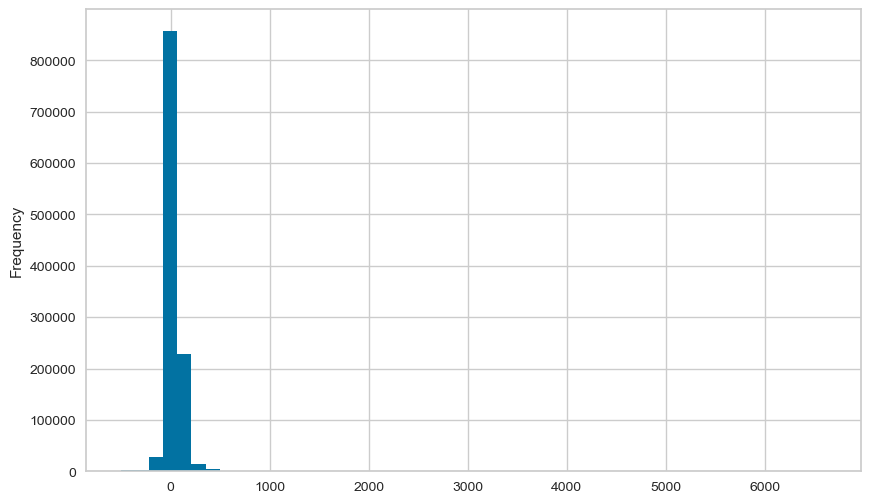

In [23]:
transaction['amount'].plot(kind='hist', bins=50, figsize=(10, 6))
plt.show()

In [24]:
#amount has negatives - observed from histogram
#most client transactions in range 10-60

transaction['amount'][(transaction['amount'] < 0) | (transaction['amount'] == 0)].shape

(56938,)

In [25]:
transaction = transaction[transaction['amount'] > 0]

In [26]:
transaction.shape

(1084374, 8)

In [27]:
user['per_capita_income'][(user['per_capita_income'] < 0) | (user['per_capita_income'] == 0)].shape

(15,)

In [28]:
user = user[user['per_capita_income'] > 0]

In [29]:
user.shape

(1985, 14)

In [30]:
#check validity

transaction['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [31]:
transaction['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [32]:
#one hot encoding
transaction = pd.get_dummies(transaction, columns=['use_chip'], dtype=int)

In [33]:
transaction.head()

,id,client_id,amount,merchant_id,merchant_category,month,hour,use_chip_Chip Transaction,use_chip_Online Transaction,use_chip_Swipe Transaction
0,22326462,496,119.35,30286,Telecommunication Services,1,0,1,0,0
1,22326465,1129,100.00,27092,Money Transfer,1,0,1,0,0
2,22326466,114,51.71,61195,Service Stations,1,0,1,0,0
3,22326467,641,105.30,75781,"Grocery Stores, Supermarkets",1,0,0,0,1
4,22326468,114,82.00,61195,Service Stations,1,0,1,0,0


In [34]:
user = pd.get_dummies(user, columns=['gender'], dtype=int)

In [35]:
user.head()

,id,current_age,retirement_age,birth_year,birth_month,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,gender_Female,gender_Male
0,825,53,66,1966,11,462 Rose Lane,34.15,-117.76,29278.0,59696.0,127613.0,787,5,1,0
1,1746,53,68,1966,12,3606 Federal Boulevard,40.76,-73.74,37891.0,77254.0,191349.0,701,5,1,0
2,1718,81,67,1938,11,766 Third Drive,34.02,-117.89,22681.0,33483.0,196.0,698,5,1,0
3,708,63,63,1957,1,3 Madison Street,40.71,-73.99,163145.0,249925.0,202328.0,722,4,1,0
4,1164,43,70,1976,9,9620 Valley Stream Drive,37.76,-122.44,53797.0,109687.0,183855.0,675,1,0,1


Spending Pattern Indicators

In [36]:
#distribution of amount category-wise
amount_spend = transaction.groupby(['client_id','merchant_category'])['amount'].sum().reset_index()

In [49]:
amount_spend.head()

,client_id,merchant_category,amount
0,0,Airlines,419.02
1,0,"Amusement Parks, Carnivals, Circuses",245.74
2,0,"Artist Supply Stores, Craft Shops",331.04
3,0,Automotive Service Shops,3080.54
4,0,Beauty and Barber Shops,321.27


In [38]:
#to get customer level details, join both datasets

In [39]:
#get sum of amount grouped at merchant level
amount_sum_merchant = transaction.groupby(['merchant_category'])['amount'].sum().reset_index()

In [40]:
#top 10 merchants as per expenses
amount_sum_merchant.nlargest(10, 'amount')

,merchant_category,amount
70,Money Transfer,4431800.00
87,Service Stations,4308039.61
45,"Grocery Stores, Supermarkets",3478169.77
106,Wholesale Clubs,3134803.99
64,Miscellaneous Food Stores,3111281.94
33,Drug Stores and Pharmacies,2958021.27
104,"Utilities - Electric, Gas, Water, Sanitary",2347853.31
26,Department Stores,2266815.77
34,Eating Places and Restaurants,2235799.23
99,Tolls and Bridge Fees,2168006.32


Save Processed Data

In [45]:
user.head(1)

,id,current_age,retirement_age,birth_year,birth_month,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,gender_Female,gender_Male
0,825,53,66,1966,11,462 Rose Lane,34.15,-117.76,29278.0,59696.0,127613.0,787,5,1,0


In [46]:
transaction.head(1)

,id,client_id,amount,merchant_id,merchant_category,month,hour,use_chip_Chip Transaction,use_chip_Online Transaction,use_chip_Swipe Transaction
0,22326462,496,119.35,30286,Telecommunication Services,1,0,1,0,0


In [47]:
transaction.to_csv('data/transaction_processed.csv', index=False)
user.to_csv('data/user_processed.csv', index=False)